# Answering Business Questions using SQL
Below we will use the [Chinook database](https://github.com/lerocha/chinook-database#:~:text=Chinook%20is%20a%20sample%20database,single%20and%20multiple%20database%20servers.), which is a sample database of a music store. 

We will be using this to run queries using SQL to supply information which can be used to inform business decisions for the store.

In [1]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

## Overview of the Data

In [2]:
%%sql
SELECT
    name,
    type
FROM sqlite_master
WHERE type in ("table", "view")

 * sqlite:///chinook.db
Done.


name,type
albums,table
sqlite_sequence,table
artists,table
customers,table
employees,table
genres,table
invoices,table
invoice_items,table
media_types,table
playlists,table


In [3]:
%%sql
SELECT *
FROM sqlite_master

 * sqlite:///chinook.db
Done.


type,name,tbl_name,rootpage,sql
table,albums,albums,2,"CREATE TABLE ""albums"" ( [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [Title] NVARCHAR(160) NOT NULL, [ArtistId] INTEGER NOT NULL, FOREIGN KEY ([ArtistId]) REFERENCES ""artists"" ([ArtistId]) ON DELETE NO ACTION ON UPDATE NO ACTION )"
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
table,artists,artists,4,"CREATE TABLE ""artists"" ( [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [Name] NVARCHAR(120) )"
table,customers,customers,5,"CREATE TABLE ""customers"" ( [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [FirstName] NVARCHAR(40) NOT NULL, [LastName] NVARCHAR(20) NOT NULL, [Company] NVARCHAR(80), [Address] NVARCHAR(70), [City] NVARCHAR(40), [State] NVARCHAR(40), [Country] NVARCHAR(40), [PostalCode] NVARCHAR(10), [Phone] NVARCHAR(24), [Fax] NVARCHAR(24), [Email] NVARCHAR(60) NOT NULL, [SupportRepId] INTEGER, FOREIGN KEY ([SupportRepId]) REFERENCES ""employees"" ([EmployeeId]) ON DELETE NO ACTION ON UPDATE NO ACTION )"
table,employees,employees,8,"CREATE TABLE ""employees"" ( [EmployeeId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [LastName] NVARCHAR(20) NOT NULL, [FirstName] NVARCHAR(20) NOT NULL, [Title] NVARCHAR(30), [ReportsTo] INTEGER, [BirthDate] DATETIME, [HireDate] DATETIME, [Address] NVARCHAR(70), [City] NVARCHAR(40), [State] NVARCHAR(40), [Country] NVARCHAR(40), [PostalCode] NVARCHAR(10), [Phone] NVARCHAR(24), [Fax] NVARCHAR(24), [Email] NVARCHAR(60), FOREIGN KEY ([ReportsTo]) REFERENCES ""employees"" ([EmployeeId]) ON DELETE NO ACTION ON UPDATE NO ACTION )"
table,genres,genres,10,"CREATE TABLE ""genres"" ( [GenreId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [Name] NVARCHAR(120) )"
table,invoices,invoices,11,"CREATE TABLE ""invoices"" ( [InvoiceId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [CustomerId] INTEGER NOT NULL, [InvoiceDate] DATETIME NOT NULL, [BillingAddress] NVARCHAR(70), [BillingCity] NVARCHAR(40), [BillingState] NVARCHAR(40), [BillingCountry] NVARCHAR(40), [BillingPostalCode] NVARCHAR(10), [Total] NUMERIC(10,2) NOT NULL, FOREIGN KEY ([CustomerId]) REFERENCES ""customers"" ([CustomerId]) ON DELETE NO ACTION ON UPDATE NO ACTION )"
table,invoice_items,invoice_items,13,"CREATE TABLE ""invoice_items"" ( [InvoiceLineId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [InvoiceId] INTEGER NOT NULL, [TrackId] INTEGER NOT NULL, [UnitPrice] NUMERIC(10,2) NOT NULL, [Quantity] INTEGER NOT NULL, FOREIGN KEY ([InvoiceId]) REFERENCES ""invoices"" ([InvoiceId]) ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ([TrackId]) REFERENCES ""tracks"" ([TrackId]) ON DELETE NO ACTION ON UPDATE NO ACTION )"
table,media_types,media_types,15,"CREATE TABLE ""media_types"" ( [MediaTypeId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [Name] NVARCHAR(120) )"
table,playlists,playlists,16,"CREATE TABLE ""playlists"" ( [PlaylistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, [Name] NVARCHAR(120) )"


## Understanding Popularity of Tracks by Genre

We have four artists we are looking to purchase albums from, and therefore need to write a query to identify which genres sell the most tracks in the USA. The four artists' music are the following genres:

- Hip-Hop
- Alternative & Punk
- Pop
- Blues

In [4]:
%%sql
SELECT *
FROM invoices
INNER JOIN invoice_items ON invoice_items.invoiceId = invoices.invoiceId
WHERE BillingCountry = 'USA'
GROUP BY BillingAddress
LIMIT 20

 * sqlite:///chinook.db
Done.


InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total,InvoiceLineId,InvoiceId_1,TrackId,UnitPrice,Quantity
15,19,2009-03-04 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,1.98,77,15,466,0.99,1
14,17,2009-03-04 00:00:00,1 Microsoft Way,Redmond,WA,USA,98052-8300,1.98,75,14,463,0.99,1
39,27,2009-06-10 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,8.91,203,39,1202,0.99,1
91,22,2010-02-08 00:00:00,120 S Orange Ave,Orlando,FL,USA,32801,1.98,493,91,3015,0.99,1
13,16,2009-02-19 00:00:00,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,0.99,74,13,462,0.99,1
92,24,2010-02-08 00:00:00,162 E Superior Street,Chicago,IL,USA,60611,1.98,495,92,3018,0.99,1
70,26,2009-11-07 00:00:00,2211 W Berry Street,Fort Worth,TX,USA,76110,1.98,379,70,2319,0.99,1
71,28,2009-11-07 00:00:00,302 S 700 E,Salt Lake City,UT,USA,84102,1.98,381,71,2322,0.99,1
17,25,2009-03-06 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,5.94,83,17,480,0.99,1
113,20,2010-05-12 00:00:00,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,1.98,609,113,211,0.99,1


In [52]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

query = """
WITH usa_tracks_sold AS
   (
    SELECT il.* FROM invoice_items il
    INNER JOIN invoices i on il.invoiceId = i.invoiceId
    INNER JOIN customers c on i.customerId = c.customerId
    WHERE c.country = "USA"
   )

SELECT
    g.name genre,
    COUNT(uts.invoiceId) tracks_sold,
    ROUND(
        COUNT(uts.invoiceId) * 100.0) / (
        SELECT COUNT(*) FROM usa_tracks_sold
    ) percentage_sold
FROM usa_tracks_sold uts
INNER JOIN tracks t on t.trackId = uts.trackId
INNER JOIN genres g on g.genreId = t.genreId
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10;"""
conn = sqlite3.connect("chinook.db")
df = pd.read_sql_query(query, conn)
df

,genre,tracks_sold,percentage_sold
0,Rock,157,31.781377
1,Latin,91,18.421053
2,Metal,64,12.955466
3,Alternative & Punk,50,10.121457
4,Jazz,22,4.453441
5,Blues,15,3.036437
6,TV Shows,14,2.834008
7,R&B/Soul,12,2.429150
8,Comedy,8,1.619433
9,Classical,8,1.619433


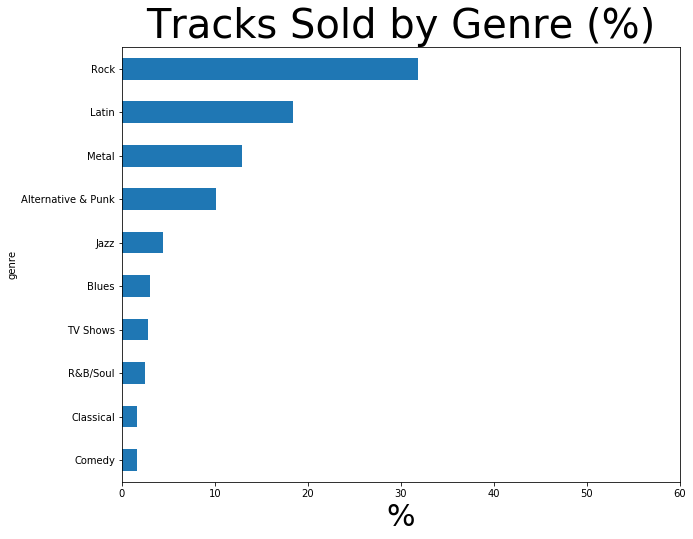

In [58]:
df = df.set_index('genre', drop=True)
fig, ax = plt.subplots(figsize=(10,8))
df['percentage_sold'].sort_values().plot.barh(xlim=(0,60),
                                             rot=0)
ax.set_title('Tracks Sold by Genre (%)', fontsize=40)
ax.set_xlabel('%', fontsize=30)
plt.show()

The output of the above query tells us that Alternative & Punk is the best performing of the genres that our prospective artists cover.

## Analysing Employee Sales Performance
Now we would like to understand the purchases of customers assigned to each employee, to see if any are performing better or worse than their colleagues. 

We will specifically write a query to return the total dollar amount of sales assigned to each sales support agent, along with their hire date so we can see any relationship between higher sales totals and longer tenure.

In [6]:
%%sql

WITH support_rep_sales AS
    (SELECT
    i.CustomerId,
    c.SupportRepId,
    e.Country,
    SUM(i.total) total
    FROM invoices i
    INNER JOIN customers c on i.CustomerId = c.CustomerId
    INNER JOIN employees e on c.SupportRepId = e.EmployeeId
    GROUP BY 1, 2)
    
SELECT
    e.FirstName || " " || e.LastName employee,
    e.HireDate,
    e.EmployeeId,
    e.Country,
    SUM(srs.total) total_sales
FROM support_rep_sales srs
INNER JOIN employees e on e.EmployeeId = srs.SupportRepId
GROUP BY 1;

 * sqlite:///chinook.db
Done.


employee,HireDate,EmployeeId,Country,total_sales
Jane Peacock,2002-04-01 00:00:00,3,Canada,833.0400000000001
Margaret Park,2003-05-03 00:00:00,4,Canada,775.4000000000001
Steve Johnson,2003-10-17 00:00:00,5,Canada,720.1600000000001


We can see the best performing sales rep is Jane Peacock, with 833 dollars in sales. However, Jane has been working at the company for over a year longer than second placed Margaret Park who has only sold 53 dollars less than Jane. 

## Analysing Sales by Country

Now we will build a query to return sales by data by country, specifically:

- Total number of customers
- Total value of sales
- Average value of sales per customer
- Average order value

In [62]:
query = """
WITH country_or_other AS
    (SELECT
        CASE
            WHEN (
                SELECT count(*)
                FROM customers
                WHERE country = c.country) = 1
                THEN "Other"
            ELSE c.country
        END AS country,
        c.CustomerId,
        it.*
        FROM invoice_items it
        INNER JOIN invoices i on i.InvoiceId = it.InvoiceId
        INNER JOIN customers c on c.CustomerId = i.CustomerId)

SELECT
    country,
    customers,
    total_sales,
    average_order,
    customer_total_value
FROM
    (SELECT
        country,
        COUNT(DISTINCT CustomerId) customers,
        SUM(UnitPrice) total_sales,
        SUM(UnitPrice) / COUNT(DISTINCT CustomerId) customer_total_value,
        SUM(UnitPrice) / COUNT(DISTINCT InvoiceId) average_order,
        CASE
            WHEN country = "Other" THEN 1
            ELSE 0
        END AS sort
    FROM country_or_other
    GROUP BY country
ORDER BY sort ASC, total_sales DESC);"""

conn = sqlite3.connect('chinook.db')
df = pd.read_sql_query(query, conn).set_index("country", drop=True)
df

,customers,total_sales,average_order,customer_total_value
country,,,,
USA,13,523.06,5.747912,40.235385
Canada,8,303.96,5.427857,37.995000
France,5,195.10,5.574286,39.020000
Brazil,5,190.10,5.431429,38.020000
Germany,4,156.48,5.588571,39.120000
United Kingdom,3,112.86,5.374286,37.620000
Czech Republic,2,90.24,6.445714,45.120000
Portugal,2,77.24,5.517143,38.620000
India,2,75.26,5.789231,37.630000


<Figure size 432x288 with 0 Axes>

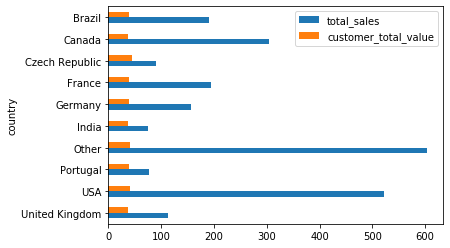

In [89]:
fig = plt.figure()
fig.add_axes()
df[['total_sales', 'customer_total_value']].sort_values('country',ascending=False).plot.barh()
#ax.set_title('Sales and Customers by Country', fontsize=40)
#ax.set_xlabel('%', fontsize=30)
#ax.set_xlim(0,650)
plt.show()

The output of the above query demonstrates that USA is the most popular country for sales overall (given 'Other' is the combination all countries with 1 customer). 

However, the country with the largest average order value is Czech Republic. Whilst the number of customers there are low, it might be worth considering some advertising here to explore if we will see a higher average spend per order as we increase our customer base. 

## Albums vs Individual Tracks

The last query we will run is to review the proportion of purchases made for individual tracks versus albums as a whole. This will inform purchasing strategy for the store, specifically whether they should continue to purchase whole albums and individual tracks or only the latter going forward.

Requirements:
Total track purchases
Total album purchases
Built using:
tracks.TrackId
albums.AlbumId
invoices.Total
invoice_items.InvoiceId

In [99]:
query = """ 
WITH invoice_album AS   (SELECT it.InvoiceId,                                     
                                t.AlbumId
                           FROM invoice_items it
                                LEFT JOIN tracks t 
                                ON t.TrackId = it.TrackId
                          GROUP BY 1),

     album_vs_tracks AS (SELECT ia.*,
                                CASE
                                WHEN (SELECT it.TrackId 
                                        FROM invoice_items it
                                       WHERE it.InvoiceId = ia.InvoiceId
                                      EXCEPT                                          
                                      SELECT t.TrackId 
                                        FROM tracks t
                                       WHERE t.AlbumId = ia.AlbumId) IS NULL
                             
                                 AND (SELECT t.TrackId 
                                        FROM tracks t
                                       WHERE t.AlbumId = ia.AlbumId                                         
                                      EXCEPT                                          
                                      SELECT it.TrackId 
                                        FROM invoice_items it
                                       WHERE it.InvoiceId = ia.InvoiceId) IS NULL
                                   
                                THEN "Albums"
                                ELSE "Tracks"
                                END AS purchase                             
                           FROM invoice_album ia)
                           
SELECT purchase,
       COUNT(*) num_invoices,
       ROUND(COUNT(*) * 100.0 /(SELECT COUNT(*)
                                  FROM invoices), 0) pct
  FROM album_vs_tracks
 GROUP BY 1
 ORDER BY 2 DESC;
"""

# Reading SQL results into a pandas DataFrame
conn = sqlite3.connect("chinook.db")
df = pd.read_sql_query(query, conn).set_index("purchase", drop=True)
print(df)

          num_invoices    pct
purchase                     
Tracks             410  100.0
Albums               2    0.0


The output shows that virtually all purchase are for albums rather than individual tracks. Therefore we can safely recommend that the Chinook store continues to purchase full albums from record companies. 